In [27]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列
file_path = '../noisy_free/evaluate#.csv'
df = pd.read_csv(file_path)

# # df = df.drop(columns=['pbid'])
# df = df[df['depth'] >= 20]
# df = df[(df['num_params'] >= 1)]
grouped_df = df.groupby(['pkid','pbid','method'], as_index=False).mean()
grouped_df.head()

,pkid,pbid,method,layers,variables,constraints,best_solution_probs,in_constraints_probs,ARG,iteration_count,classcial,quantum,run_times
0,0,0,ChocoSolver,5.0,6.0,3.0,88.574219,100.000000,0.105608,103.0,1.065669,3.577990,114.0
1,0,0,HeaSolver,5.0,6.0,3.0,1.660156,22.460938,24.812779,301.0,25.532021,75.182802,331.0
2,0,0,PenaltySolver,5.0,6.0,3.0,1.269531,23.535156,24.305525,139.0,10.577958,39.359810,153.0
3,0,0,QtoSimplifyDiscardSegmentedSolver,5.0,6.0,3.0,100.000000,100.000000,0.000000,26.0,0.366013,3.718321,82.0
4,0,0,QtoSimplifyDiscardSolver,5.0,6.0,3.0,99.804688,100.000000,0.001776,44.0,0.489324,1.515508,55.0


In [28]:
grouped_df['single_latency'] = grouped_df['quantum']/grouped_df['run_times']
grouped_df = grouped_df.groupby(['pkid','method'], as_index=False).mean()

In [29]:
grouped_df = grouped_df[grouped_df['pkid']%4 == 0]
grouped_df['pksid'] = grouped_df['pkid']//4

In [30]:
grouped_df

,pkid,method,pbid,layers,variables,constraints,best_solution_probs,in_constraints_probs,ARG,iteration_count,classcial,quantum,run_times,single_latency,pksid
0,0,ChocoSolver,49.500000,5.0,6.0,3.0,88.339844,100.000000,9.594922e-02,107.580000,1.028801,4.010968,118.870000,0.033868,0
1,0,HeaSolver,49.500000,5.0,6.0,3.0,4.754883,20.225586,4.700902e+01,301.000000,25.875957,70.802194,331.000000,0.213904,0
2,0,PenaltySolver,49.500000,5.0,6.0,3.0,5.660156,19.438477,5.143487e+01,113.720000,9.343684,27.214758,125.600000,0.216771,0
3,0,QtoSimplifyDiscardSegmentedSolver,49.500000,5.0,6.0,3.0,99.666016,100.000000,1.672832e-03,28.590000,0.536213,3.591739,91.800000,0.039931,0
4,0,QtoSimplifyDiscardSolver,49.500000,5.0,6.0,3.0,96.693359,100.000000,8.402948e-03,40.730000,0.407297,1.319528,69.520000,0.021730,0
5,0,QtoSimplifySolver,49.500000,5.0,6.0,3.0,96.520508,100.000000,1.112307e-02,90.970000,0.691567,3.048385,136.500000,0.025666,0
6,0,QtoSolver,49.500000,5.0,6.0,3.0,97.750000,100.000000,6.966324e-03,91.450000,0.692749,2.931258,137.280000,0.024516,0
28,4,ChocoSolver,49.500000,5.0,12.0,6.0,54.845703,100.000000,2.152296e-01,107.060000,3.588515,4.349313,118.320000,0.036806,1
29,4,HeaSolver,49.500000,5.0,12.0,6.0,0.142578,0.519531,1.779855e+02,301.000000,456.923634,35.328531,331.000000,0.106733,1
30,4,PenaltySolver,49.500000,5.0,12.0,6.0,0.654297,2.416992,1.329727e+02,112.260000,143.636033,22.413841,124.050000,0.180879,1


In [36]:
## noise data
file_path = 'ibm_kyiv.csv'
df = pd.read_csv(file_path)

# # df = df.drop(columns=['pbid'])
# df = df[df['depth'] >= 20]
# df = df[(df['num_params'] >= 1)]
kyiv_df = df.groupby(['pksid','pkid','method'], as_index=False).mean()
kyiv_df = kyiv_df.merge(grouped_df[['pksid','method','single_latency']], on=['pksid','method'])
kyiv_df['quantum'] = kyiv_df['single_latency'] * kyiv_df['run_times']
kyiv_df

,pksid,pkid,method,pbid,layers,variables,constraints,best_solution_probs,in_constraints_probs,ARG,iteration_count,classcial,quantum,run_times,single_latency
0,0,0,ChocoSolver,1.5,1.0,6.0,3.0,8.398438,17.968750,36.006128,15.750,0.614027,307.792224,9088.0,0.033868
1,0,0,HeaSolver,1.5,5.0,6.0,3.0,1.416016,6.005859,58.309534,31.000,1.327496,3723.639234,17408.0,0.213904
2,0,0,PenaltySolver,1.5,5.0,6.0,3.0,1.367188,6.298828,55.609370,31.000,1.288463,3773.541829,17408.0,0.216771
3,0,0,QtoSimplifyDiscardSegmentedSolver,1.5,5.0,6.0,3.0,60.243652,100.000000,0.146313,30.000,4.895098,4068.443282,101888.0,0.039931
4,0,0,QtoSimplifyDiscardSolver,1.5,5.0,6.0,3.0,5.029297,13.867188,31.453340,15.750,0.734752,197.481062,9088.0,0.021730
5,0,0,QtoSimplifySolver,1.5,5.0,6.0,3.0,2.197266,5.566406,58.554047,31.000,1.610358,446.798203,17408.0,0.025666
6,0,0,QtoSolver,1.5,5.0,6.0,3.0,1.464844,7.177734,55.946254,31.000,1.714915,426.772876,17408.0,0.024516
7,1,0,ChocoSolver,1.5,1.0,8.0,6.0,0.830078,2.026367,163.910878,15.625,4.064610,332.133249,9024.0,0.036806
8,1,0,HeaSolver,1.5,5.0,8.0,6.0,0.512695,1.904297,162.306356,31.000,8.478087,1858.003232,17408.0,0.106733
9,1,0,PenaltySolver,1.5,5.0,8.0,6.0,0.561523,1.879883,165.519216,31.000,8.702243,3148.741334,17408.0,0.180879


In [37]:
file_path = 'ibm_brisbane.csv'
df = pd.read_csv(file_path)

brisbane_df = df.groupby(['pksid','pkid','method'], as_index=False).mean()
brisbane_df = brisbane_df.merge(grouped_df[['pksid','method','single_latency']], on=['pksid','method'])
brisbane_df['quantum'] = brisbane_df['single_latency'] * brisbane_df['run_times']
brisbane_df

,pksid,pkid,method,pbid,layers,variables,constraints,best_solution_probs,in_constraints_probs,ARG,iteration_count,classcial,quantum,run_times,single_latency
0,0,0,ChocoSolver,1.5,1.0,6.0,3.0,7.714844,16.357422,34.259372,15.50,0.584210,303.457122,8960.0,0.033868
1,0,0,HeaSolver,1.5,5.0,6.0,3.0,1.416016,5.273438,58.893969,31.00,1.210410,3723.639234,17408.0,0.213904
2,0,0,PenaltySolver,1.5,5.0,6.0,3.0,1.220703,7.080078,55.544498,31.00,1.377114,3773.541829,17408.0,0.216771
3,0,0,QtoSimplifyDiscardSegmentedSolver,1.5,5.0,6.0,3.0,48.677155,100.000000,0.205977,29.00,4.767269,4150.221037,103936.0,0.039931
4,0,0,QtoSimplifyDiscardSolver,1.5,5.0,6.0,3.0,4.003906,12.890625,36.056503,15.75,0.776262,197.481062,9088.0,0.021730
5,0,0,QtoSimplifySolver,1.5,5.0,6.0,3.0,1.660156,3.515625,62.310545,31.00,1.514670,446.798203,17408.0,0.025666
6,0,0,QtoSolver,1.5,5.0,6.0,3.0,1.123047,2.978516,67.082873,31.00,1.533194,426.772876,17408.0,0.024516
7,1,0,ChocoSolver,1.5,1.0,8.0,6.0,0.537109,1.806641,162.773459,15.75,3.999751,334.488804,9088.0,0.036806
8,1,0,HeaSolver,1.5,5.0,8.0,6.0,0.195312,1.074219,170.474840,31.00,8.353920,1858.003232,17408.0,0.106733
9,1,0,PenaltySolver,1.5,5.0,8.0,6.0,0.585938,1.757812,160.025276,31.00,8.388428,3148.741334,17408.0,0.180879


2512.066848817293
2993.1254117685367
336.9002453341687
222.8510748564277
2512.066848817293
2993.1254117685367
333.6107846062733
222.5010039475445


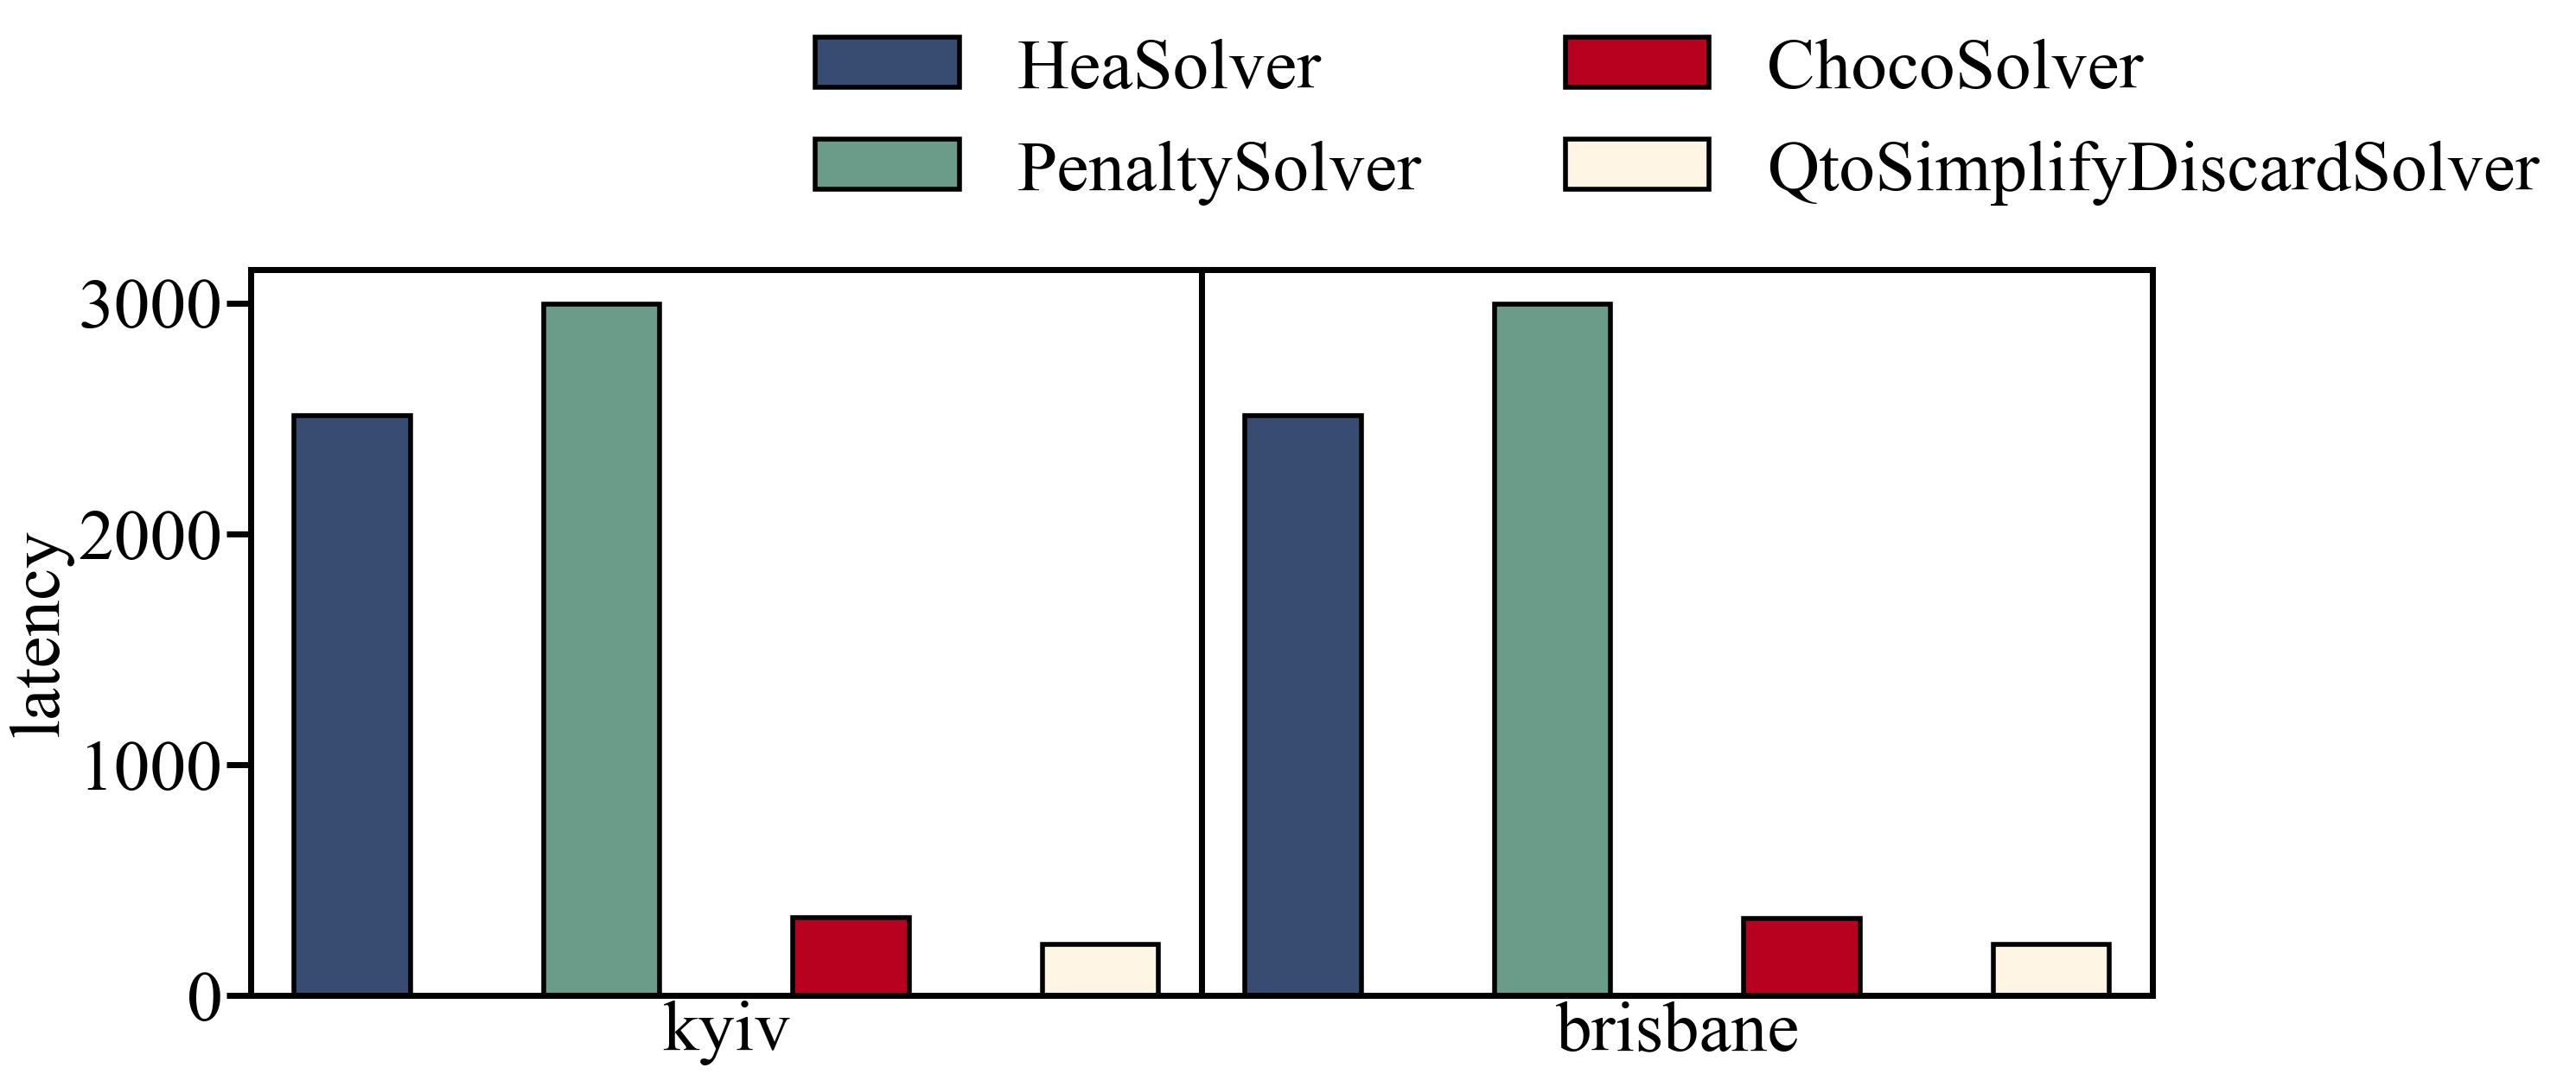

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" :  'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})
# 定义方法和设备
methods = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSolver']
locations = ['kyiv', 'brisbane']  # 分类依据：location
device_df = [kyiv_df, brisbane_df]

# 设置颜色和柱宽
move = 0.15  # 用于计算位置偏移
visible_bar_width = 0.07  # 实际柱子宽度
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4','#FFF']
hatchs = ['', '', '', '']
metric = 'quantum'

# 绘图
for i, location in enumerate(locations):
    ax = plt.axes((i * 0.5, 0, 0.5, 0.7))  

    for idx, method in enumerate(methods):
#         # 获取当前设备和方法的数据
        data = device_df[i]
        method_data = data[data['method'] == method]
        y = method_data[metric].mean()
        plt.bar(
            idx * move,  # 调整柱子位置以使分组居中
            y,
            visible_bar_width,  # 固定的显示宽度
            color=colors[idx],
            edgecolor="black",
            label=method,
            linewidth=4,
        )
        print(y)
    plt.xticks([])  # 显示 pkid 作为 x 轴
    plt.xlabel(location)
    # plt.yscale('log')
    if i == 0:
        plt.ylabel('latency')
    else:
        plt.yticks([])

    # plt.ylim(0.1, 150)
    # plt.grid(True, linestyle='--', linewidth=1.5, axis='y')

plt.legend(frameon=False, bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=2)
# ax = plt.axes((0, 0, 1, 1))
plt.savefig('realqpu_latency.svg', bbox_inches='tight')